Object Detection/Recognition

In [1]:
!pip install -U transformers
!pip install -U datasets
!pip install timm
!pip install inflect
!pip install phonemizer
!pip install gradio
!apt-get update && apt-get install -y espeak-ng
!pip install py-espeak-ng

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.0 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.52.4
    Uninstalling transformers-4.52.4:
      Successfully uninstalled transformers-4.52.4
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 13.6 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
  Attempting uninstall: datasets
    Found existing installation: datasets 2.14.4
    Uninstalling datasets-2.14.4:
      Successfully uninstalled datasets-2.14.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linu

In [2]:
from transformers.utils import logging
logging.set_verbosity_error()
from helper import load_image_from_url, render_results_in_image
from helper import ignore_warnings
ignore_warnings()
from transformers import pipeline
from datasets import load_dataset, load_from_disk
from IPython.display import Audio as IPythonAudio

import os
import gradio as gr
import io

Prepare the dataset of audio recordings

In [3]:
od_pipe = pipeline("object-detection", "facebook/detr-resnet-50")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for conv1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.weight: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pass `assign=True` to assign items in the state dictionary to their corresponding key in the module instead of copying them in place?)
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:2397: UserWarning: for bn1.bias: copying from a non-meta parameter in the checkpoint to a meta parameter in the current model, which is a no-op. (Did you mean to pas

preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

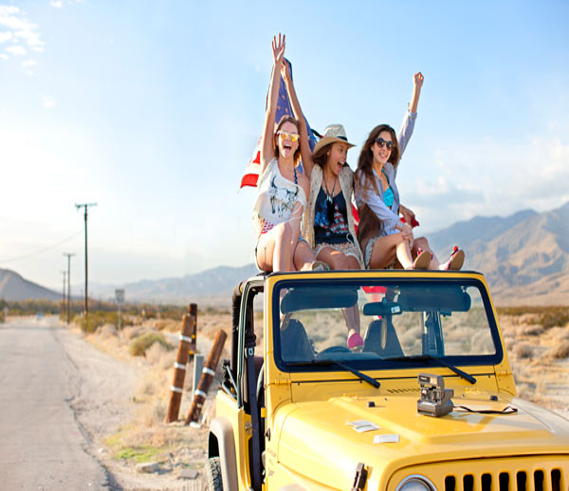

In [5]:
from PIL import Image
raw_image = Image.open('/content/test.jpg')
raw_image.resize((569, 491))

In [6]:
pipeline_output = od_pipe(raw_image)

In [7]:
processed_image = render_results_in_image(
    raw_image,
    pipeline_output)

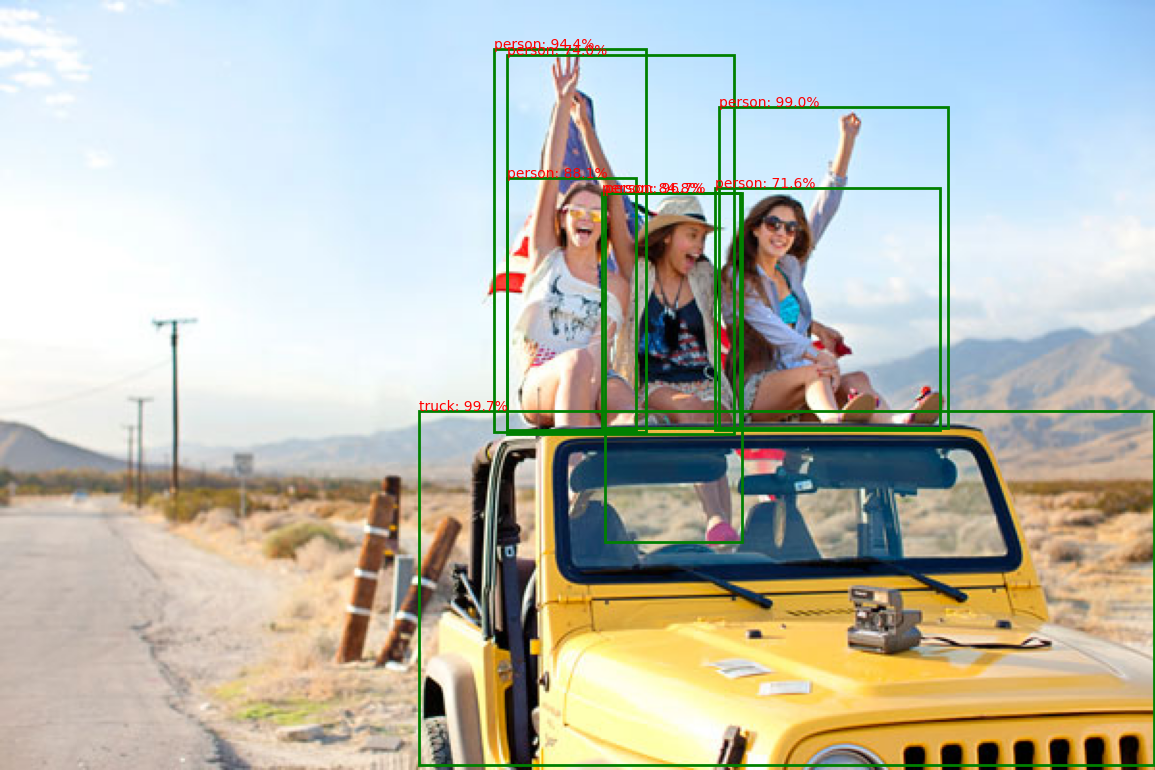

In [8]:
processed_image

In [9]:
import os
import gradio as gr
PORT1=3000

In [10]:

def get_pipeline_prediction(pil_image):

    pipeline_output = od_pipe(pil_image)

    processed_image = render_results_in_image(pil_image,
                                            pipeline_output)
    return processed_image

In [11]:
demo = gr.Interface(
  fn=get_pipeline_prediction,
  inputs=gr.Image(label="Input image",
                  type="pil"),
  outputs=gr.Image(label="Output image with predicted instances",
                   type="pil")
)

In [14]:
demo.launch(share=True, server_port=3000)
# demo.launch(share=True, server_port=int(os.environ['PORT1']))

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://eca4c60266e5939925.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [15]:
demo.close()

Closing server running on port: 3000


Generate Audio Narration of an Image

In [18]:
pipeline_output

[{'score': 0.9439601898193359,
  'label': 'person',
  'box': {'xmin': 256, 'ymin': 25, 'xmax': 335, 'ymax': 224}},
 {'score': 0.8483797907829285,
  'label': 'person',
  'box': {'xmin': 312, 'ymin': 100, 'xmax': 384, 'ymax': 222}},
 {'score': 0.7399283051490784,
  'label': 'person',
  'box': {'xmin': 263, 'ymin': 28, 'xmax': 381, 'ymax': 225}},
 {'score': 0.9970489144325256,
  'label': 'truck',
  'box': {'xmin': 217, 'ymin': 213, 'xmax': 599, 'ymax': 397}},
 {'score': 0.715756356716156,
  'label': 'person',
  'box': {'xmin': 371, 'ymin': 97, 'xmax': 488, 'ymax': 223}},
 {'score': 0.8806816339492798,
  'label': 'person',
  'box': {'xmin': 263, 'ymin': 92, 'xmax': 330, 'ymax': 223}},
 {'score': 0.9665617942810059,
  'label': 'person',
  'box': {'xmin': 314, 'ymin': 100, 'xmax': 385, 'ymax': 281}},
 {'score': 0.9901142120361328,
  'label': 'person',
  'box': {'xmin': 373, 'ymin': 55, 'xmax': 492, 'ymax': 222}}]

In [19]:
od_pipe

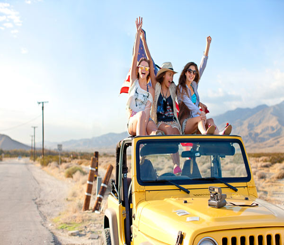

In [20]:
raw_image = Image.open('/content/test.jpg')
raw_image.resize((284, 245))

In [21]:
from helper import summarize_predictions_natural_language

In [22]:
text = summarize_predictions_natural_language(pipeline_output)

In [23]:
text

'In this image, there are seven persons and one truck.'

In [16]:
tts_pipe = pipeline("text-to-speech",
                    model="kakao-enterprise/vits-ljs")

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/145M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/285 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/47.0 [00:00<?, ?B/s]

In [24]:
narrated_text = tts_pipe(text)

In [25]:
from IPython.display import Audio as IPythonAudio

In [26]:
IPythonAudio(narrated_text["audio"][0],
             rate=narrated_text["sampling_rate"])